# Tugas Kelompok - 1
---
## Anggota Kelompok
- Frederick Liko
- Kenzie Pragata
- Aswin Angkasa
- Giovanny Halimko
- Samuel Onasis

## Table of Contents
- [Tugas Kelompok - 1](#tugas-kelompok---1)
    - [Anggota Kelompok](#anggota-kelompok)
    - [Table of Contents](#table-of-contents)
    - [To-Do Task](#to-do-task)
    - [Tahap 1 (Dataset Preparation, and Preprocessing)](#tahap-1-dataset-preparation-and-preprocessing)
        - [Pilih 50 citra dari database - COCO](#pilih-50-citra-dari-database---coco)
        - [Preprocessing pada citra](#preprocessing-pada-citra)
            - [Declare Function](#declare-function)
            - [Display Image](#display-image)
            - [Process Image](#process-image)
    - [Tahap 2 (Image Separation and Feature Detection)](#tahap-2-image-separation-and-feature-detection)
    - [Tahap 3 (Noise Removal and Quality Enhancement)](#tahap-3-noise-removal-and-quality-enhancement)
    - [Tahap 4 (Object Segmentation Enhancement)](#tahap-4-object-segmentation-enhancement)
    - [Tahap 5 (Feature Detection and Object Matching)](#tahap-5-feature-detection-and-object-matching)

## To-Do Task
> Harap lakukan instalasi `Markdown Checkbox Extension` agar format *checkbox* dapat terlihat.
[Download](https://marketplace.visualstudio.com/items/?itemName=bierner.markdown-checkbox)

**Tahap 1**
- [x] Pilih 50 citra dari database - WikiImg, ImageNet
- [ ] Preprocessing pada citra - Normalisasi / Contrast / Sharpening

**Tahap 2**
- [ ] Lakukan pemisahan pada citra - Edge Detection, Thresholding, atau Segmentasi
- [ ] Lakukan deteksi fitur pada citra - Harris Corner Detection atau SIFT

**Tahap 3**
- [ ] Lakukan konvolusi untuk menghilangkan noise - Gaussian Blur, atau Median Filter
- [ ] Lakukan peningkatan kualitas citra - Kernel Prewit, Robert, atau Sobel (Minimal 2)

**Tahap 4**
- [ ] Tingkatkan segmentasi objek pada citra - Dilasi, Erosi, Opening atau Closing (Minimal 2)
- [ ] Olah citra dengan: Hitung lubang, Skeletonisasi, atau Filling Holes

**Tahap 5**
- [ ] Deteksi fitur - SIFT, SURF, atau ORB
- [ ] Lakukan pencocokan objek menggunakan citra satu dengan citra lainnya

## Preparation

### Import Library
Disini adalah beberapa library yang digunakan dalam tugas ini. Library ini digunakan untuk melakukan berbagai operasi pada citra, seperti pembacaan citra, konversi warna, dan pemrosesan citra.

**Lakukan instalasi library yang diperlukan dengan perintah berikut:**

```bash
pip install opencv-python numpy matplotlib scikit-image
```


In [31]:
import os

import numpy as np
import cv2

# Image downloading libraries
import torchvision.datasets as dset
from torchvision.transforms import ToTensor

# Image processing libraries
from PIL import Image, ImageEnhance

# Image rendering libraries
import matplotlib.pyplot as plt


### Quick Setting
Pada bagian ini, kita akan mengatur beberapa parameter yang akan mempermudah kita dalam memproses citra.

- Jumlah citra yang akan digunakan
- Ukuran citra
- Ukuran kernel untuk konvolusi
- Ukuran kernel untuk dilasi dan erosi

In [32]:
# Maximum of 100 can be loaded at once
image_to_load = 50
image_to_process = 1

image_size = (256, 256)

### Quick Check Before Running
Untuk memastikan bahwa semua library yang diperlukan telah terinstal dan dapat digunakan, kita akan melakukan beberapa pengecekan awal. Pastikan Anda telah menginstal semua library yang diperlukan sebelum menjalankan kode ini.


In [33]:
assert image_to_load <= 100, "Maximum of 100 images can be loaded at once."

assert image_to_process <= image_to_load, "Image to process must be less than or equal to image to load."

# Assert librarys are installed
assert dset, "torchvision not installed. Please install torchvision."
assert Image, "PIL not installed. Please install Pillow."
assert plt, "matplotlib not installed. Please install matplotlib."

## Tahap 1 (Dataset Preparation, and Preprocessing)
Pada tahap ini, kita akan melakukan persiapan dataset dan preprocessing pada citra. 

Kita akan menggunakan citra dari dataset yang sudah ada, dan melakukan beberapa operasi preprocessing seperti normalisasi, konversi warna, dan penghapusan noise.

### Pilih 50 citra dari database - COCO
Dibawah ini adalah beberapa citra yang diambil dari database COCO. Citra-citra ini akan digunakan untuk melakukan berbagai operasi pemrosesan citra. Citra-citra ini diambil dari berbagai kategori, seperti hewan, tumbuhan, dan objek lainnya.


In [34]:
from torchvision.transforms.functional import to_pil_image

# Load the COCO dataset using torchvision
coco_dataset = dset.CocoDetection(
    root='coco/images/val2017',
    annFile='coco/annotations/instances_val2017.json',
    transform=ToTensor()
)


# Save up to 50 images from the COCO dataset
output_dir = "coco_images"
os.makedirs(output_dir, exist_ok=True)
for i, (image, _) in enumerate(coco_dataset):
    if i >= image_to_load:  # Limit to 50 images
        break
    image_path = os.path.join(output_dir, f"image_{i+1}.jpg")
    image_pil = to_pil_image(image)
    image_pil.save(image_path)
    print(f"Saved: {image_path}")


loading annotations into memory...
Done (t=1.30s)
creating index...
index created!
Saved: coco_images\image_1.jpg
Saved: coco_images\image_2.jpg
Saved: coco_images\image_3.jpg
Saved: coco_images\image_4.jpg
Saved: coco_images\image_5.jpg
Saved: coco_images\image_6.jpg
Saved: coco_images\image_7.jpg
Saved: coco_images\image_8.jpg
Saved: coco_images\image_9.jpg
Saved: coco_images\image_10.jpg
Saved: coco_images\image_11.jpg
Saved: coco_images\image_12.jpg
Saved: coco_images\image_13.jpg
Saved: coco_images\image_14.jpg
Saved: coco_images\image_15.jpg
Saved: coco_images\image_16.jpg
Saved: coco_images\image_17.jpg
Saved: coco_images\image_18.jpg
Saved: coco_images\image_19.jpg
Saved: coco_images\image_20.jpg
Saved: coco_images\image_21.jpg
Saved: coco_images\image_22.jpg
Saved: coco_images\image_23.jpg
Saved: coco_images\image_24.jpg
Saved: coco_images\image_25.jpg
Saved: coco_images\image_26.jpg
Saved: coco_images\image_27.jpg
Saved: coco_images\image_28.jpg
Saved: coco_images\image_29.jp

### Preprocessing pada citra

- Menggunakan gambar dari dataset COCO untuk operasi peningkatan kontras.
- Peningkatan kontras membantu memperjelas detail pada citra, memudahkan deteksi fitur dan segmentasi.
- Normalisasi dilakukan dengan:
    - Mengubah warna citra menjadi grayscale.
    - Mengubah ukuran citra menjadi 256x256 piksel.
    - Melakukan skalasi dengan rendah (0-255) untuk meningkatkan kontras.
- Ukuran seragam 256x256 piksel mempermudah proses pemrosesan citra selanjutnya.


#### Declare Function
Disini adalah beberapa fungsi yang digunakan untuk melakukan operasi pada citra. Fungsi-fungsi ini digunakan untuk melakukan berbagai operasi seperti pembacaan citra, konversi warna, dan pemrosesan citra.

In [35]:
def resize_image(image_path, output_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Resize the image
    image = image.resize(image_size)

    # Save the processed image
    image.save(output_path)
    print(f"Resized and saved: {output_path}")

def convert_to_grayscale(image_path, output_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Convert to grayscale
    image = image.convert("L")

    # Save the processed image
    image.save(output_path)
    print(f"Converted to grayscale and saved: {output_path}")

def enhance_contrast(image_path, output_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Enhance contrast
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(2.0)

    # Save the processed image
    image.save(output_path)
    print(f"Enhanced contrast and saved: {output_path}")

def sharpen_image(image_path, output_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Sharpen the image
    enhancer = ImageEnhance.Sharpness(image)
    image = enhancer.enhance(2.0)

    # Save the processed image
    image.save(output_path)
    print(f"Sharpened and saved: {output_path}")

def normalize_image(image_path, output_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Normalize the image to [0, 1]
    image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    # Convert back to uint8 for saving
    image = (image * 255).astype(np.uint8)

    # Save the processed image
    cv2.imwrite(output_path, image)
    print(f"Normalized and saved: {output_path}")

def process_image(image_path, output_path):
    # Resize the image
    resize_image(image_path, output_path)

    # Convert to grayscale
    convert_to_grayscale(image_path, output_path)

    # Enhance contrast
    enhance_contrast(image_path, output_path)

    # Sharpen the image
    sharpen_image(image_path, output_path)

    # Normalize the image
    normalize_image(image_path, output_path)

#### Display Image
Untuk menampilkan citra yang telah diproses, kita akan menggunakan fungsi `display_image`. 

Fungsi ini akan menampilkan citra dalam ukuran yang sesuai dengan ukuran citra asli. Kita juga akan menambahkan judul pada citra yang ditampilkan untuk memudahkan identifikasi citra.

Dengan memanfaatkan matplotlib, kita dapat menampilkan citra dengan lebih baik dan memberikan informasi tambahan seperti judul dan ukuran citra.



In [36]:
import matplotlib.patches as patches

def display_image(image_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()



### Process Image
Disini adalah beberapa citra yang telah diproses dengan menggunakan fungsi-fungsi yang telah didefinisikan sebelumnya. Citra-citra ini telah mengalami berbagai operasi pemrosesan citra seperti konversi warna, normalisasi, dan penghapusan noise.

Resized and saved: processed_images\processed_image_1.jpg
Converted to grayscale and saved: processed_images\processed_image_1.jpg
Enhanced contrast and saved: processed_images\processed_image_1.jpg
Sharpened and saved: processed_images\processed_image_1.jpg
Normalized and saved: processed_images\processed_image_1.jpg


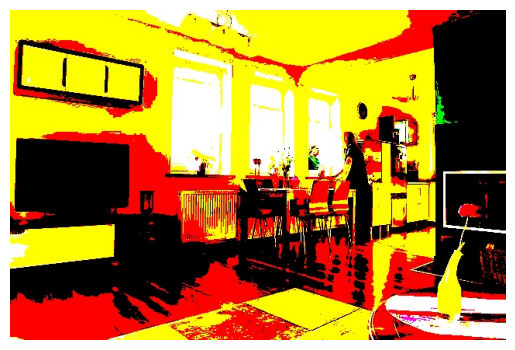

In [37]:
input_dir = 'coco_images'
output_dir = 'processed_images'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process and display the images
for i in range(1, image_to_process + 1):
    image_path = os.path.join(input_dir, f"image_{i}.jpg")
    output_path = os.path.join(output_dir, f"processed_image_{i}.jpg")

    # Process the image
    process_image(image_path, output_path)

    # Display the processed image
    display_image(output_path)


